<a href="https://colab.research.google.com/github/imadegunawinangun/10-Animal-Classification/blob/main/Klasifikasi_Hewan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/RumahGugun/10-Animal-Classification

fatal: destination path '10-Animal-Classification' already exists and is not an empty directory.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
import zipfile
import os
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
ls 10-Animal-Classification/

raw-img/  raw-imgtraining/  raw-imgvalidation/  translate.py


In [ ]:
ls 10-Animal-Classification/raw-img/

cane/     elefante/  gallina/  mucca/   ragno/
cavallo/  farfalla/  gatto/    pecora/  scoiattolo/


In [ ]:
base_dir = '10-Animal-Classification/raw-img'

cane = os.path.join(base_dir, 'cane')
elefante = os.path.join(base_dir, 'elefante')
gallina = os.path.join(base_dir, 'gallina')
mucca = os.path.join(base_dir, 'mucca')
ragno = os.path.join(base_dir, 'ragno')
cavallo = os.path.join(base_dir, 'cavallo')
farfalla = os.path.join(base_dir, 'farfalla')
gatto = os.path.join(base_dir, 'gatto')
pecora = os.path.join(base_dir, 'pecora')
scoiattolo = os.path.join(base_dir, 'scoiattolo')

In [ ]:
import ntpath

def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail

In [ ]:
def load_image(datadir):
  image_path = []
  label = []
  path_temp = path_leaf(datadir)

  for i in range(len(os.listdir(datadir))):
    image_path.append(os.path.join(datadir, os.listdir(datadir)[i].strip()))
    label.append(path_temp)

  image_paths = np.asarray(image_path)
  labels = np.asarray(label)
  return image_paths, labels

In [ ]:
cane_data, cane_label = load_image(cane)
elefante_data, elefante_labels = load_image(elefante)
gallina_data, gallina_labels = load_image(gallina)
mucca_data, mucca_labels = load_image(mucca)
ragno_data, ragno_labels = load_image(ragno)
cavallo_data, cavallo_labels = load_image(cavallo)
farfalla_data, farfalla_labels = load_image(farfalla)
gatto_data, gatto_labels = load_image(gatto)
pecora_data, pecora_labels = load_image(pecora)
scoiattolo_data, scoiattolo_labels = load_image(scoiattolo)

In [ ]:
cane_data

array(['10-Animal-Classification/raw-img/cane/OIP-JaPhQuyVJVdCUwo6PmYAiwHaDu.jpeg',
       '10-Animal-Classification/raw-img/cane/OIP-YZIVbtRw67HdaYnNbFJiLAHaFj.jpeg',
       '10-Animal-Classification/raw-img/cane/OIP-0rl28i9PdxDkBEM3EzU2GgHaMc.jpeg',
       ...,
       '10-Animal-Classification/raw-img/cane/OIP-MBOnYEFeqZovETV1miCCNAHaE7.jpeg',
       '10-Animal-Classification/raw-img/cane/OIP-H8M9JnrQvcVk56MZyCpPowHaE9.jpeg',
       '10-Animal-Classification/raw-img/cane/OIP-37BmaMmElztxHt_9eNrLZgHaFk.jpeg'],
      dtype='<U73')

In [ ]:
cane_label

array(['cane', 'cane', 'cane', ..., 'cane', 'cane', 'cane'], dtype='<U4')

In [ ]:
#JALANKAN UNTUK MENGHAPUS FOLDER TRAINING DAN VALIDATION
shutil.rmtree(base_dir+'training')
shutil.rmtree(base_dir+'validation')

In [ ]:
if not os.path.exists(base_dir+'training'): os.makedirs(base_dir+'training')
if not os.path.exists(base_dir+'training/cane'): os.makedirs(base_dir+'training/cane')
if not os.path.exists(base_dir+'training/elefante'): os.makedirs(base_dir+'training/elefante')
if not os.path.exists(base_dir+'training/gallina'): os.makedirs(base_dir+'training/gallina')
if not os.path.exists(base_dir+'training/mucca'): os.makedirs(base_dir+'training/mucca')
if not os.path.exists(base_dir+'training/ragno'): os.makedirs(base_dir+'training/ragno')
if not os.path.exists(base_dir+'training/cavallo'): os.makedirs(base_dir+'training/cavallo')
if not os.path.exists(base_dir+'training/farfalla'): os.makedirs(base_dir+'training/farfalla')
if not os.path.exists(base_dir+'training/gatto'): os.makedirs(base_dir+'training/gatto')
if not os.path.exists(base_dir+'training/pecora'): os.makedirs(base_dir+'training/pecora')
if not os.path.exists(base_dir+'training/scoiattolo'): os.makedirs(base_dir+'training/scoiattolo')

if not os.path.exists(base_dir+'validation'):  os.makedirs(base_dir+'validation')
if not os.path.exists(base_dir+'validation/cane'): os.makedirs(base_dir+'validation/cane')
if not os.path.exists(base_dir+'validation/elefante'): os.makedirs(base_dir+'validation/elefante')
if not os.path.exists(base_dir+'validation/gallina'): os.makedirs(base_dir+'validation/gallina')
if not os.path.exists(base_dir+'validation/mucca'): os.makedirs(base_dir+'validation/mucca')
if not os.path.exists(base_dir+'validation/ragno'): os.makedirs(base_dir+'validation/ragno')
if not os.path.exists(base_dir+'validation/cavallo'): os.makedirs(base_dir+'validation/cavallo')
if not os.path.exists(base_dir+'validation/farfalla'): os.makedirs(base_dir+'validation/farfalla')
if not os.path.exists(base_dir+'validation/gatto'): os.makedirs(base_dir+'validation/gatto')
if not os.path.exists(base_dir+'validation/pecora'): os.makedirs(base_dir+'validation/pecora')
if not os.path.exists(base_dir+'validation/scoiattolo'): os.makedirs(base_dir+'validation/scoiattolo')

In [ ]:
from sklearn.model_selection import train_test_split

cane_train, cane_valid = train_test_split(cane_data, train_size = 0.8, random_state = 1)
print('cane Training Samples: {}\nValid Samples: {}'.format(len(cane_train), len(cane_valid)))
for i in range(len(cane_train)):
  if not os.path.exists(base_dir+'training/cane/'+path_leaf(cane_train[i])):
    shutil.copyfile(cane_train[i], base_dir+'training/cane/'+path_leaf(cane_train[i]))
for i in range(len(cane_valid)):
  if not os.path.exists(base_dir+'validation/cane/'+path_leaf(cane_valid[i])):
    shutil.copyfile(cane_valid[i], base_dir+'validation/cane/'+path_leaf(cane_valid[i]))

elefante_train, elefante_valid = train_test_split(elefante_data, train_size = 0.8, random_state = 1)
print('elefante Training Samples: {}\nValid Samples: {}'.format(len(elefante_train), len(elefante_valid)))
for i in range(len(elefante_train)):
  if not os.path.exists(base_dir+'training/elefante/'+path_leaf(elefante_train[i])):
    shutil.copyfile(elefante_train[i], base_dir+'training/elefante/'+path_leaf(elefante_train[i]))
for i in range(len(elefante_valid)):
  if not os.path.exists(base_dir+'validation/elefante/'+path_leaf(elefante_valid[i])):
    shutil.copyfile(elefante_valid[i], base_dir+'validation/elefante/'+path_leaf(elefante_valid[i]))

gallina_train, gallina_valid = train_test_split(gallina_data, train_size = 0.8, random_state = 1)
print('gallina Training Samples: {}\nValid Samples: {}'.format(len(gallina_train), len(gallina_valid)))
for i in range(len(gallina_train)):
  shutil.copyfile(gallina_train[i], base_dir+'training/gallina/'+path_leaf(gallina_train[i]))
for i in range(len(gallina_valid)):
  shutil.copyfile(gallina_valid[i], base_dir+'validation/gallina/'+path_leaf(gallina_valid[i]))

mucca_train, mucca_valid = train_test_split(mucca_data, train_size = 0.8, random_state = 1)
print('mucca Training Samples: {}\nValid Samples: {}'.format(len(mucca_train), len(mucca_valid)))
for i in range(len(mucca_train)):
  shutil.copyfile(mucca_train[i], base_dir+'training/mucca/'+path_leaf(mucca_train[i]))
for i in range(len(mucca_valid)):
  shutil.copyfile(mucca_valid[i], base_dir+'validation/mucca/'+path_leaf(mucca_valid[i]))

ragno_train, ragno_valid = train_test_split(ragno_data, train_size = 0.8, random_state = 1)
print('ragno Training Samples: {}\nValid Samples: {}'.format(len(ragno_train), len(ragno_valid)))
for i in range(len(ragno_train)):
  shutil.copyfile(ragno_train[i], base_dir+'training/ragno/'+path_leaf(ragno_train[i]))
for i in range(len(ragno_valid)):
  shutil.copyfile(ragno_valid[i], base_dir+'validation/ragno/'+path_leaf(ragno_valid[i]))

cavallo_train, cavallo_valid = train_test_split(cavallo_data, train_size = 0.8, random_state = 1)
print('cavallo Training Samples: {}\nValid Samples: {}'.format(len(cavallo_train), len(cavallo_valid)))
for i in range(len(cavallo_train)):
  shutil.copyfile(cavallo_train[i], base_dir+'training/cavallo/'+path_leaf(cavallo_train[i]))
for i in range(len(cavallo_valid)):
  shutil.copyfile(cavallo_valid[i], base_dir+'validation/cavallo/'+path_leaf(cavallo_valid[i]))

farfalla_train, farfalla_valid = train_test_split(farfalla_data, train_size = 0.8, random_state = 1)
print('farfalla Training Samples: {}\nValid Samples: {}'.format(len(farfalla_train), len(farfalla_valid)))
for i in range(len(farfalla_train)):
  shutil.copyfile(farfalla_train[i], base_dir+'training/farfalla/'+path_leaf(farfalla_train[i]))
for i in range(len(farfalla_valid)):
  shutil.copyfile(farfalla_valid[i], base_dir+'validation/farfalla/'+path_leaf(farfalla_valid[i]))
  
gatto_train, gatto_valid = train_test_split(gatto_data, train_size = 0.8, random_state = 1)
print('gatto Training Samples: {}\nValid Samples: {}'.format(len(gatto_train), len(gatto_valid)))
for i in range(len(gatto_train)):
  shutil.copyfile(gatto_train[i], base_dir+'training/gatto/'+path_leaf(gatto_train[i]))
for i in range(len(gatto_valid)):
  shutil.copyfile(gatto_valid[i], base_dir+'validation/gatto/'+path_leaf(gatto_valid[i]))
  
pecora_train, pecora_valid = train_test_split(pecora_data, train_size = 0.8, random_state = 1)
print('pecora Training Samples: {}\nValid Samples: {}'.format(len(pecora_train), len(pecora_valid)))
for i in range(len(pecora_train)):
  shutil.copyfile(pecora_train[i], base_dir+'training/pecora/'+path_leaf(pecora_train[i]))
for i in range(len(pecora_valid)):
  shutil.copyfile(pecora_valid[i], base_dir+'validation/pecora/'+path_leaf(pecora_valid[i]))
  
scoiattolo_train, scoiattolo_valid = train_test_split(scoiattolo_data, train_size = 0.8, random_state = 1)
print('scoiattolo Training Samples: {}\nValid Samples: {}'.format(len(scoiattolo_train), len(scoiattolo_valid)))
for i in range(len(scoiattolo_train)):
  shutil.copyfile(scoiattolo_train[i], base_dir+'training/scoiattolo/'+path_leaf(scoiattolo_train[i]))
for i in range(len(scoiattolo_valid)):
  shutil.copyfile(scoiattolo_valid[i], base_dir+'validation/scoiattolo/'+path_leaf(scoiattolo_valid[i]))
  



cane Training Samples: 3890
Valid Samples: 973
elefante Training Samples: 1156
Valid Samples: 290
gallina Training Samples: 2478
Valid Samples: 620
mucca Training Samples: 1492
Valid Samples: 374
ragno Training Samples: 3856
Valid Samples: 965
cavallo Training Samples: 2098
Valid Samples: 525
farfalla Training Samples: 1689
Valid Samples: 423
gatto Training Samples: 1334
Valid Samples: 334
pecora Training Samples: 1456
Valid Samples: 364
scoiattolo Training Samples: 1489
Valid Samples: 373


In [ ]:
train_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=90,
    height_shift_range=0.1,
    width_shift_range=0.1,
    zoom_range=0.1,
    brightness_range = (0.5,1.2),
)

valid_generator = ImageDataGenerator(
    rescale=1./255,
)

In [ ]:
IMAGE_SHAPE = (128, 128)

train_images = train_generator.flow_from_directory(
    base_dir+'training',
    target_size=IMAGE_SHAPE,
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=10
)

val_images = valid_generator.flow_from_directory(
    base_dir+'validation',
    target_size=IMAGE_SHAPE,
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=10,
)

Found 20938 images belonging to 10 classes.
Found 5241 images belonging to 10 classes.


(32, 128, 128, 3)


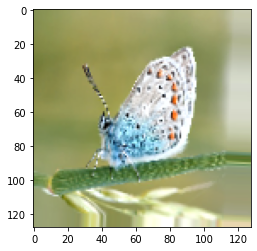

(32, 128, 128, 3)


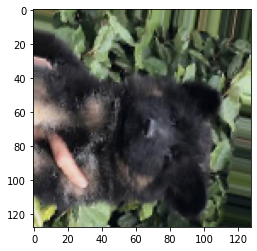

(32, 128, 128, 3)


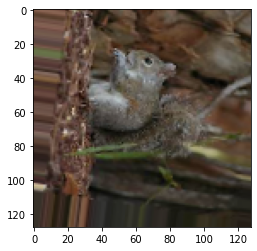

(32, 128, 128, 3)


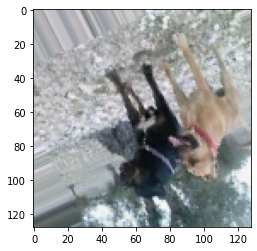

(32, 128, 128, 3)


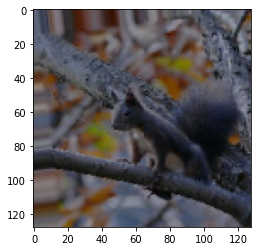

In [ ]:
for _ in range(5):
    img, label = train_images.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[1])
    plt.show()

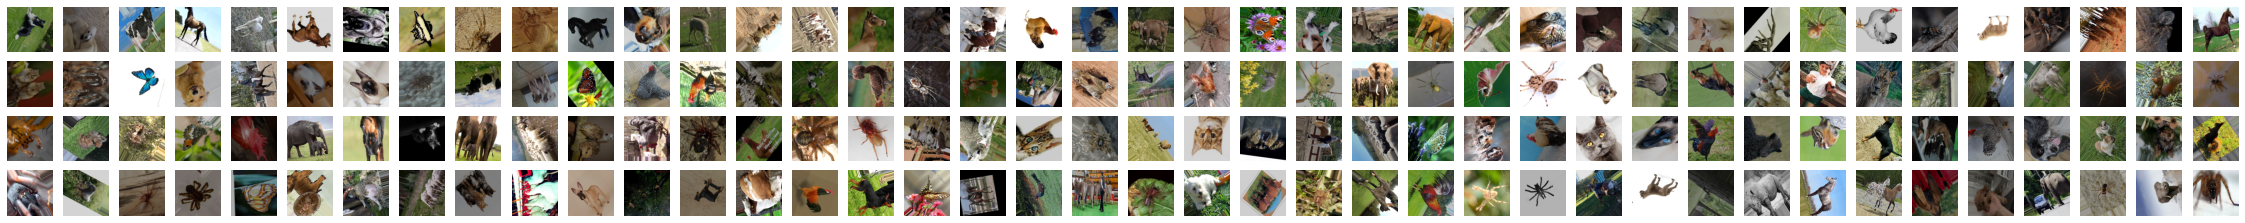

In [ ]:
plt.figure(figsize=(40, 40))

for i in range(160):
    plt.subplot(40, 40, i + 1)
    img = train_images.next()[0][0]
    plt.imshow(img)
    plt.axis('off')

plt.show()

In [ ]:
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import VGG16, MobileNetV2
from tensorflow.keras.optimizers import Adam

class ModifiedMobileNet():
    '''
    This class creates the mobilenet model.
    '''
    # konfigurasi object
    def __init__(self, input_shape, nb_classes):
        self.input_shape = input_shape
        self.nb_classes = nb_classes
    
    # fungsi untuk membangun model dengan MobilenetV2
    def get_model(self, unfreeze_layers = None, lr_rate = 0.001):
        
        # Memuat model MobileNetV2 dengan tidak meninclude top layer, dan input shape yang disesuaikan oleh parameter input_shape
        base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=self.input_shape)
        
        # freezing layers
        for layer in (base_model.layers) if not unfreeze_layers else (base_model.layers[:-int(unfreeze_layers)]):
            layer.trainable = False
        
        #inputan untuk model berupa shape
        inputs = Input(shape=self.input_shape)

        #memasukan input layer
        x = base_model(inputs, training=False)
        #menambah layer MaxPooling2D ke dalam base_model
        x = tf.keras.layers.MaxPooling2D()(x)
        #menambah layer Dense ke dalam base_model
        x = tf.keras.layers.Dense(128, activation='relu')(x)
        #menambah layer Dropout ke dalam base_model
        x = tf.keras.layers.Dropout(0.1)(x)
        #menambah layer Dense ke dalam base_model
        x = tf.keras.layers.Dense(128, activation='relu')(x)
        #menambah layer Dropout ke dalam base_model
        x = tf.keras.layers.Dropout(0.1)(x)
        #layer output Dense dengan filter sebanyak label class
        outputs = tf.keras.layers.Dense(self.nb_classes, activation='softmax')(x)
        #menggabungkan inputs dan outputs kedalam Model
        model = Model(inputs, outputs)
        
        # model compilation
        optimizer = Adam(learning_rate=LEARNING_RATE)
        model.compile(loss='categorical_crossentropy', optimizer= optimizer, metrics=['accuracy'])
        return model

In [ ]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3
IMAGE_SHAPE = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
EPOCHS = 20
BATCH_SIZE = 20
LEARNING_RATE = 1e-3

mobilenet = ModifiedMobileNet(input_shape= IMAGE_SHAPE, nb_classes= 10)
model2 = mobilenet.get_model(unfreeze_layers=0, lr_rate= LEARNING_RATE)

In [ ]:
history = model2.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    validation_steps=val_images.n//val_images.batch_size,
    steps_per_epoch=train_images.n // train_images.batch_size,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=5,
            restore_best_weights=True
        )
    ],
)
print(model.summary())

Epoch 1/100


ValueError: ignored